## Artificial Neural Network and Convolutional Neural Network Classification of the CIFAR10 Dataset.

- The dataset contains 60,000 colored images in the dimension 32x32 in 10 classes or outputs. The test images are 10,000 while the training data are 50,000. The aim of this project is to build a neural network that will sucessfully identify which class an image belong to upon viewing it.

#### Import the required libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models


In [2]:
#load the dataset from the keras library
#split the dataset into test and train 
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

- Note that this implies that there are 50000 training images of 32x32 pixels in RGB color format

In [3]:
#there are 10000 32x32 colored pixel images
X_test.shape

(10000, 32, 32, 3)

In [4]:
#an overview of the first 5 images in the y_train. This shows that it is a multidimensional array, a two dimensional arra.
#I'll need to reshape it and bring it to a one dimensional array so that way
# our neural network can recognize it properly. 
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#the .reshape function is used to change the dimension of an array as one see fit
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
#our output variables/labels/classes  are 10 in number according to the dataset. 
classes = ['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']
classes[9]

'truck'

In [7]:
#creating a function that allows us to visually plot the arrays (images) is the 
#next course of action
def plot_images (X,y,index): #the call function
    plt.figure(figsize=(12,2)) #the size of the image
    plt.imshow(X[index]) #the image will be selected from the X dataset
    plt.xlabel(classes[y[index]]) #the label will be the class from the y dataset

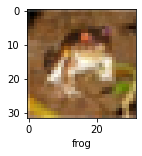

In [8]:
plot_images(X_train,y_train,0)

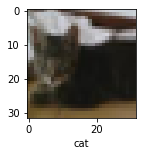

In [9]:
plot_images(X_train,y_train,9)

In [10]:
#kernels are used to represent images as numbers. The kenrel ranges fromm 0 to 255
#with black=0 and white=255. Because of the type of activation function I'll be using, and also to improve the overall
#accuracy of the model, its best to scale the input data

X_train=X_train/255
X_test=X_test/255

#### Artificial Neural Network
- The flowchart of a normal neural network is input data-hidden layer(s)-activation function-output however, the pathway is data-model~objective function~optimization.
- First we feed the data as inputs and they must be in one dimension.
- Next we build our model
- Create our objective function and optimizer

In [11]:
#model
model=models.Sequential([ #.Sequnetial allows us to stack the layerss on each other
    layers.Flatten(input_shape=(32,32,3)), #the input data must be in a one dimensional array and the .flatten is used to transform it
    layers.Dense(3000,activation='relu'), #this is an hidden layer with relu activation function. Relu takes the maximum number between 0 and a
    layers.Dense(1000,activation='relu'), #another hiddden layer
    layers.Dense(10,activation='sigmoid') #output layer with the activation layer Sigmoid. Sigmoid takes it range from 0 to 1. Its results are in a probability format
])

#Optimizer
model.compile(optimizer='SGD', #the stochastic gradient decent is an optimization function
              loss='sparse_categorical_crossentropy', #this is a loss function used for classification and belongs in the cross entropy category
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5) #this means that we want our model to run propagate 5 times till it gets the lowest loss function and the highest accuracy

Epoch 1/5
1563/1563 [==============================] - 344s 137ms/step - loss: 1.8103 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 187s 120ms/step - loss: 1.6248 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 193s 124ms/step - loss: 1.5400 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.4813 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.4337 - accuracy: 0.4955


In [29]:
#validate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 25s 34ms/step - loss: 1.5814 - accuracy: 0.4355


[1.581419587135315, 0.43549999594688416]

- the loss function is high and the accuracy is low hence there is need to improved our model as it didnt perform well

In [12]:
#as with the normal classification technique, we can check the perfomance of the nueral network 
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred]
                
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 15s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.41      0.51      1000
           1       0.65      0.56      0.60      1000
           2       0.41      0.23      0.29      1000
           3       0.32      0.32      0.32      1000
           4       0.55      0.14      0.22      1000
           5       0.56      0.21      0.31      1000
           6       0.24      0.92      0.38      1000
           7       0.66      0.41      0.51      1000
           8       0.62      0.64      0.63      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.44     10000
   macro avg       0.53      0.44      0.43     10000
weighted avg       0.53      0.44      0.43     10000



-

In [13]:
cnn_model=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [14]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

In [15]:
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 115s 58ms/step - loss: 1.4461 - accuracy: 0.4804
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0933 - accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9672 - accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8811 - accuracy: 0.6947
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8155 - accuracy: 0.7162
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7606 - accuracy: 0.7368
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7128 - accuracy: 0.7508
Epoch 8/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.6701 - accuracy: 0.7663
Epoch 9/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6312 - accuracy: 0.7798
Epoch 10/10
1563/1563 [==============================] - 78s 50

In [16]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 23s 14ms/step - loss: 0.9116 - accuracy: 0.6988


[0.9115891456604004, 0.6988000273704529]

In [17]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

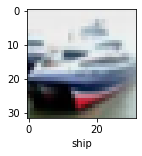

In [18]:
plot_images(X_test,y_test,1)

In [19]:
y_pred=cnn_model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[2.80263863e-04, 1.44448993e-03, 4.51932719e-04, 7.07153797e-01,
        9.27037763e-05, 2.79028088e-01, 6.80777244e-03, 5.76437014e-05,
        3.37775936e-03, 1.30550133e-03],
       [1.35411113e-03, 1.31817453e-03, 1.56224118e-07, 1.87340170e-08,
        1.94771643e-09, 1.37519174e-09, 4.59360631e-12, 2.02794972e-08,
        9.97312307e-01, 1.51672994e-05],
       [1.00655884e-01, 2.47877613e-02, 1.05579558e-03, 2.82629374e-02,
        3.75616335e-04, 2.60138791e-03, 6.23276210e-05, 3.06306686e-03,
        8.26836109e-01, 1.22991251e-02],
       [3.44378412e-01, 3.98653792e-04, 6.67178712e-04, 2.70362914e-04,
        1.00021745e-04, 7.31095679e-06, 6.84176712e-06, 4.62242933e-05,
        6.54071569e-01, 5.33530219e-05],
       [8.30388061e-08, 1.65759332e-07, 4.72465716e-03, 1.29511044e-03,
        3.81618105e-02, 5.23043855e-06, 9.55803335e-01, 1.80845845e-08,
        9.52426944e-06, 1.81094713e-08]], dtype=float32)

In [20]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

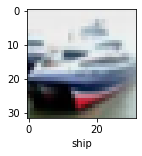

In [22]:
plot_images(X_test,y_test,1)

In [23]:
classes[y_classes[1]]

'ship'

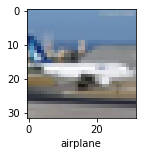

In [27]:
plot_images(X_test,y_test,90)

In [28]:
classes[y_classes[90]]

'ship'

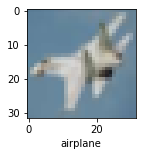

In [25]:
plot_images(X_test,y_test,10)

In [26]:
classes[y_classes[10]]

'airplane'

In [24]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.85      0.76      0.80      1000
           2       0.61      0.59      0.60      1000
           3       0.51      0.53      0.52      1000
           4       0.61      0.69      0.65      1000
           5       0.68      0.50      0.58      1000
           6       0.75      0.81      0.78      1000
           7       0.73      0.77      0.75      1000
           8       0.74      0.85      0.79      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

